# Brownian Bridge: Theory and Simulation

## 1. Introduction

A **Brownian bridge** is a continuous-time stochastic process whose probability distribution is the conditional distribution of a standard Wiener process (Brownian motion) $W(t)$ subject to the constraint that it returns to zero at time $T$. It is a fundamental object in probability theory with applications in statistics, finance, and physics.

## 2. Mathematical Definition

### 2.1 Standard Brownian Motion

Recall that a standard Brownian motion $\{W(t)\}_{t \geq 0}$ satisfies:
- $W(0) = 0$
- Independent increments: $W(t) - W(s)$ is independent of $\{W(u) : u \leq s\}$ for $s < t$
- Gaussian increments: $W(t) - W(s) \sim \mathcal{N}(0, t-s)$
- Continuous sample paths

### 2.2 Brownian Bridge Definition

A **Brownian bridge** on $[0, T]$ is defined as:
$$B(t) = W(t) - \frac{t}{T}W(T), \quad t \in [0, T]$$

where $W(t)$ is a standard Brownian motion. This construction ensures:
- $B(0) = 0$
- $B(T) = 0$ (the "bridge" property)

### 2.3 Statistical Properties

The Brownian bridge has the following key properties:

**Mean:**
$$\mathbb{E}[B(t)] = 0$$

**Covariance:**
$$\text{Cov}(B(s), B(t)) = \min(s, t) - \frac{st}{T}$$

For $s \leq t$, this simplifies to:
$$\text{Cov}(B(s), B(t)) = s\left(1 - \frac{t}{T}\right)$$

**Variance:**
$$\text{Var}(B(t)) = t\left(1 - \frac{t}{T}\right) = \frac{t(T-t)}{T}$$

The variance is maximized at $t = T/2$, where $\text{Var}(B(T/2)) = T/4$.

### 2.4 Alternative Construction (Conditional Distribution)

Equivalently, the Brownian bridge can be defined as Brownian motion conditioned on returning to the origin:
$$B(t) \stackrel{d}{=} \left( W(t) \mid W(T) = 0 \right)$$

## 3. Simulation Methods

### 3.1 Direct Construction

The most straightforward method: simulate $W(t)$ and apply the transformation $B(t) = W(t) - \frac{t}{T}W(T)$.

### 3.2 Sequential Simulation

For time points $0 = t_0 < t_1 < \cdots < t_n = T$, we can simulate sequentially using:
$$B(t_{i+1}) \mid B(t_i) \sim \mathcal{N}\left(\frac{T - t_{i+1}}{T - t_i}B(t_i), \frac{(t_{i+1} - t_i)(T - t_{i+1})}{T - t_i}\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
T = 1.0          # Terminal time
n_steps = 1000   # Number of time steps
n_paths = 50     # Number of sample paths

# Time grid
dt = T / n_steps
t = np.linspace(0, T, n_steps + 1)

In [2]:
def simulate_brownian_bridge_direct(t, T, n_paths):
    """
    Simulate Brownian bridge using direct construction:
    B(t) = W(t) - (t/T) * W(T)
    
    Parameters:
    -----------
    t : array-like
        Time points
    T : float
        Terminal time
    n_paths : int
        Number of sample paths to simulate
    
    Returns:
    --------
    B : ndarray
        Shape (n_paths, len(t)), Brownian bridge paths
    W : ndarray
        Shape (n_paths, len(t)), underlying Brownian motion paths
    """
    n_steps = len(t) - 1
    dt = T / n_steps
    
    # Generate Brownian motion increments
    dW = np.random.normal(0, np.sqrt(dt), size=(n_paths, n_steps))
    
    # Construct Brownian motion paths
    W = np.zeros((n_paths, n_steps + 1))
    W[:, 1:] = np.cumsum(dW, axis=1)
    
    # Construct Brownian bridge: B(t) = W(t) - (t/T) * W(T)
    W_T = W[:, -1]  # Terminal values
    B = W - np.outer(W_T, t / T)
    
    return B, W

# Simulate paths
B, W = simulate_brownian_bridge_direct(t, T, n_paths)

In [3]:
def theoretical_variance(t, T):
    """
    Compute theoretical variance of Brownian bridge:
    Var(B(t)) = t(T-t)/T
    """
    return t * (T - t) / T

def theoretical_std(t, T):
    """Standard deviation envelope."""
    return np.sqrt(theoretical_variance(t, T))

## 4. Visualization and Analysis

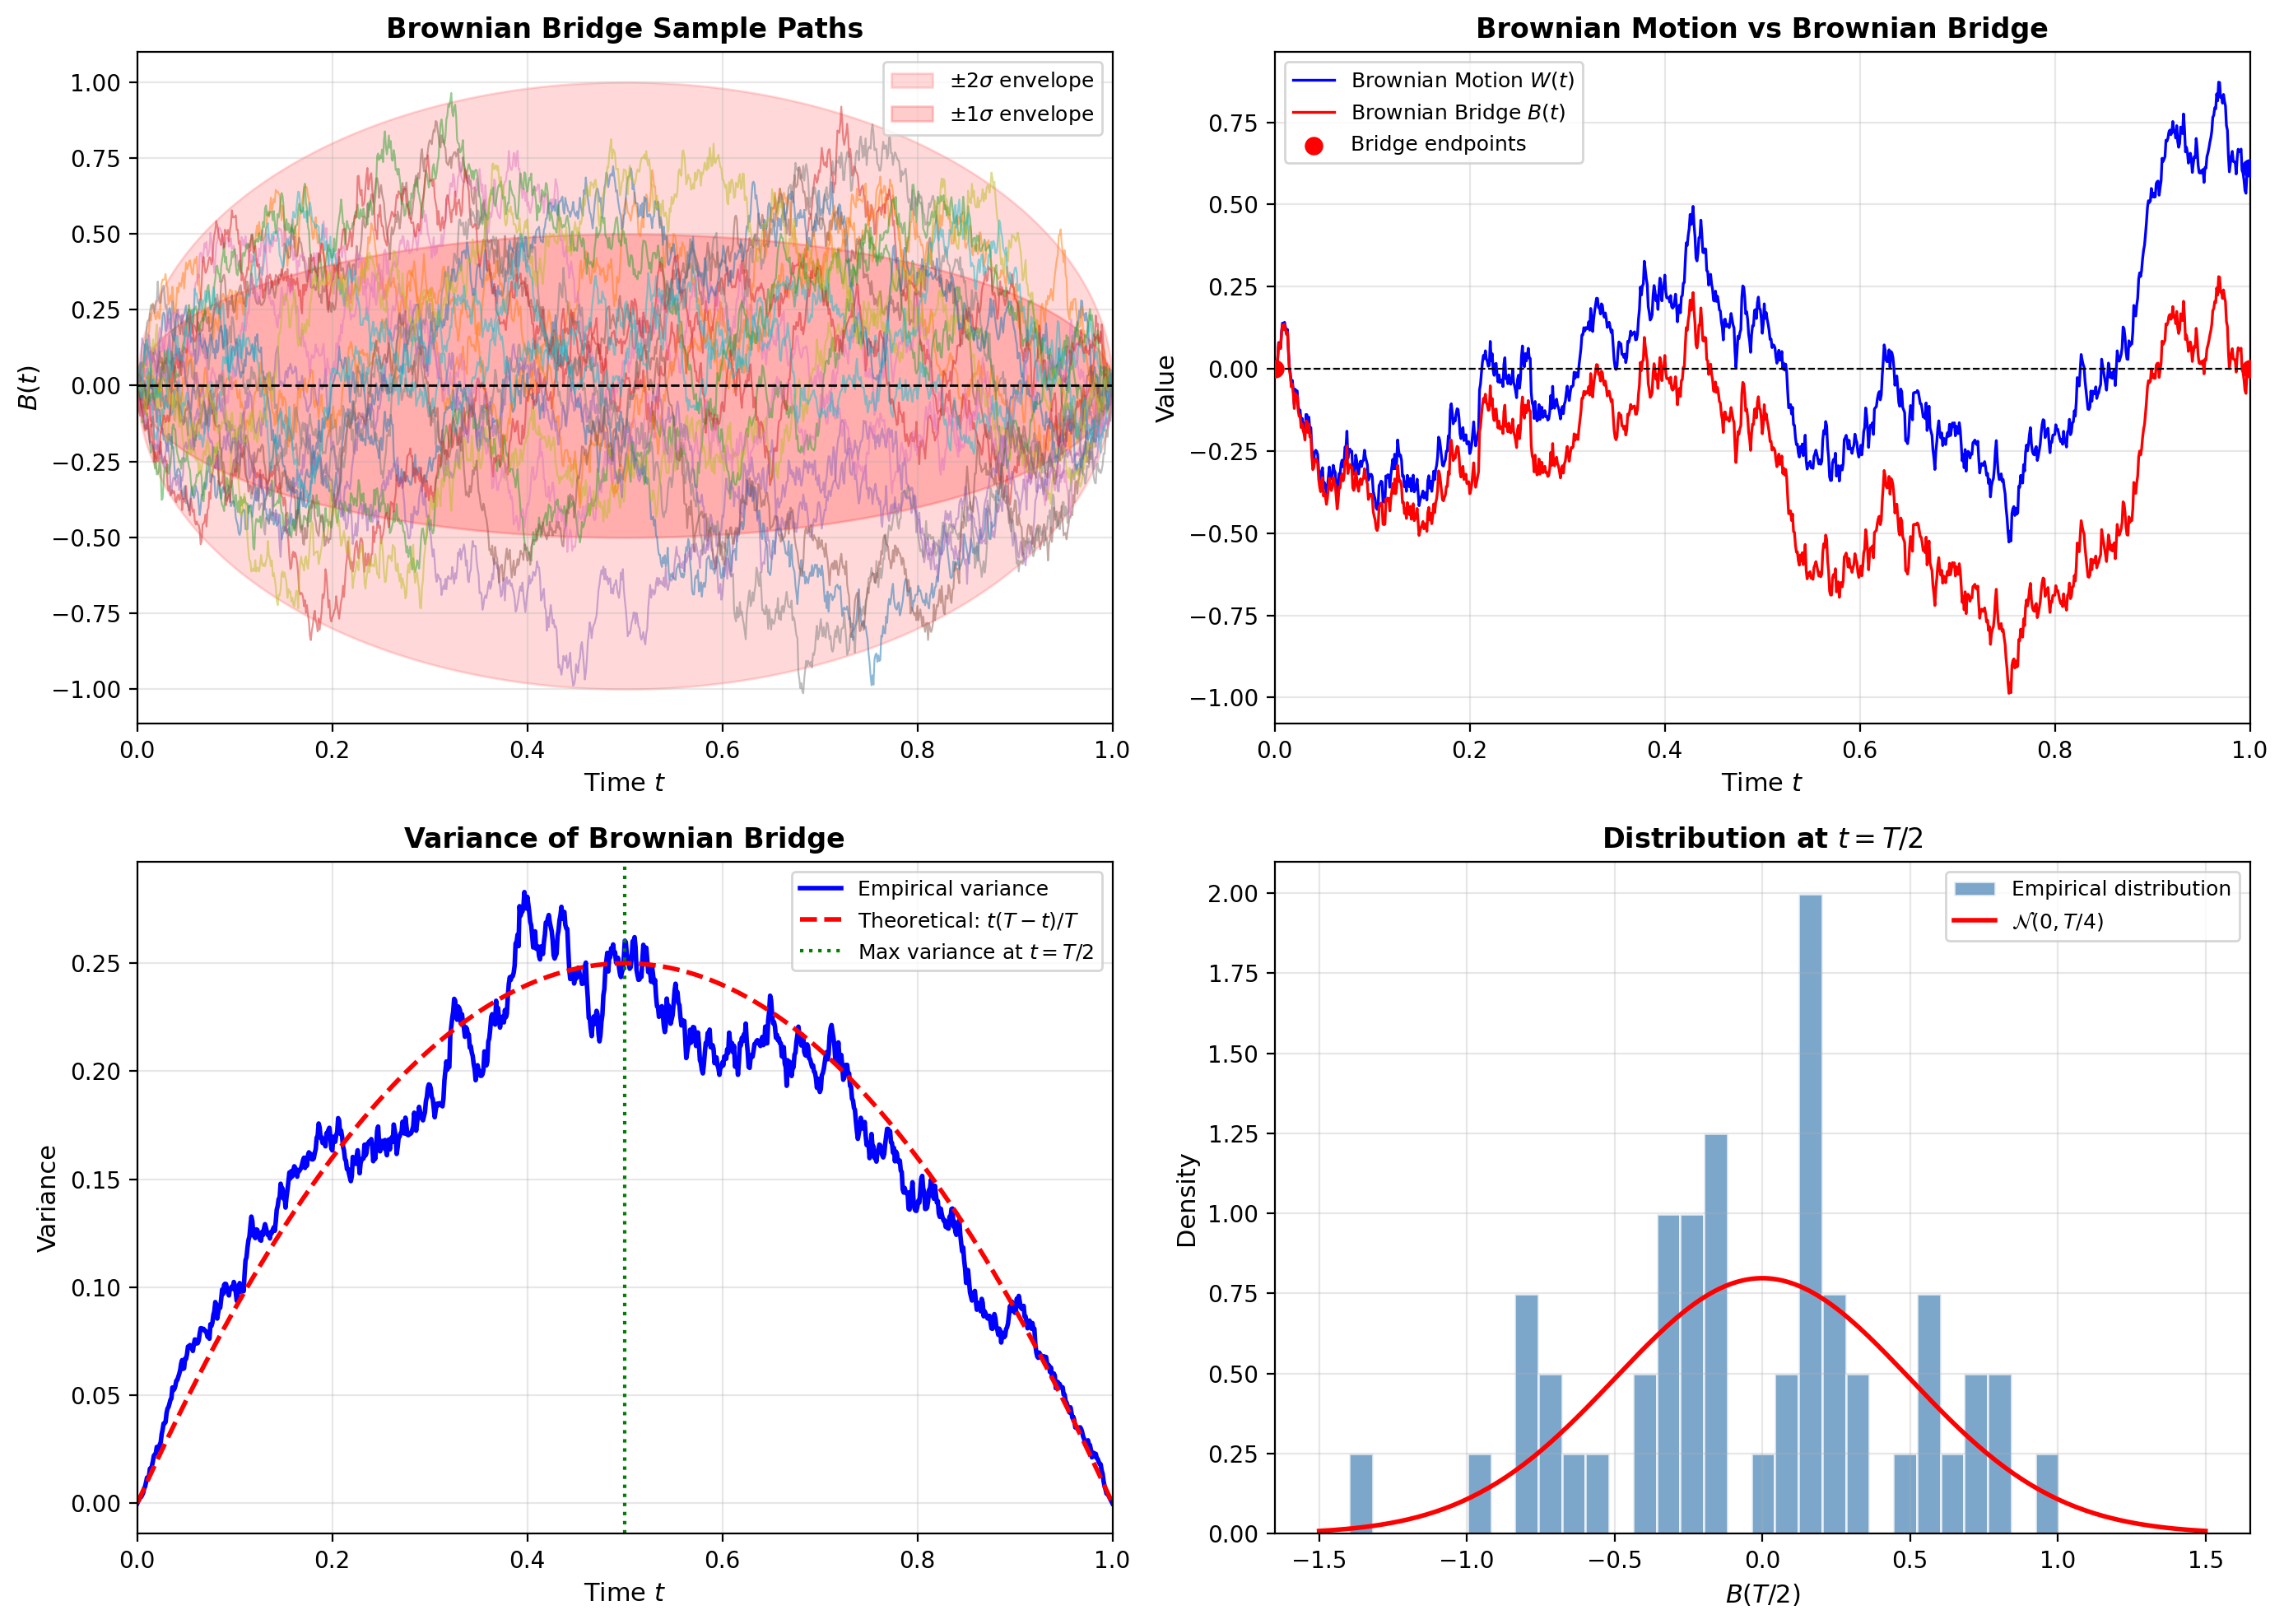

Figure saved to plot.png


In [4]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Plot 1: Sample Brownian Bridge Paths ---
ax1 = axes[0, 0]
for i in range(min(20, n_paths)):
    ax1.plot(t, B[i, :], alpha=0.5, linewidth=0.8)

# Add theoretical standard deviation envelope
std_envelope = theoretical_std(t, T)
ax1.fill_between(t, -2*std_envelope, 2*std_envelope, 
                  color='red', alpha=0.15, label=r'$\pm 2\sigma$ envelope')
ax1.fill_between(t, -std_envelope, std_envelope, 
                  color='red', alpha=0.2, label=r'$\pm 1\sigma$ envelope')

ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax1.set_xlabel('Time $t$', fontsize=11)
ax1.set_ylabel('$B(t)$', fontsize=11)
ax1.set_title('Brownian Bridge Sample Paths', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, T])

# --- Plot 2: Comparison with Standard Brownian Motion ---
ax2 = axes[0, 1]
idx = 0  # Use first path for comparison
ax2.plot(t, W[idx, :], label='Brownian Motion $W(t)$', color='blue', linewidth=1.2)
ax2.plot(t, B[idx, :], label='Brownian Bridge $B(t)$', color='red', linewidth=1.2)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax2.scatter([0, T], [0, 0], color='red', s=50, zorder=5, 
            label='Bridge endpoints')
ax2.scatter([T], [W[idx, -1]], color='blue', s=50, zorder=5)

ax2.set_xlabel('Time $t$', fontsize=11)
ax2.set_ylabel('Value', fontsize=11)
ax2.set_title('Brownian Motion vs Brownian Bridge', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, T])

# --- Plot 3: Empirical vs Theoretical Variance ---
ax3 = axes[1, 0]
empirical_var = np.var(B, axis=0)
theoretical_var = theoretical_variance(t, T)

ax3.plot(t, empirical_var, 'b-', linewidth=2, label='Empirical variance')
ax3.plot(t, theoretical_var, 'r--', linewidth=2, label=r'Theoretical: $t(T-t)/T$')
ax3.axvline(x=T/2, color='green', linestyle=':', linewidth=1.5, 
            label=f'Max variance at $t=T/2$')

ax3.set_xlabel('Time $t$', fontsize=11)
ax3.set_ylabel('Variance', fontsize=11)
ax3.set_title('Variance of Brownian Bridge', fontsize=12, fontweight='bold')
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xlim([0, T])

# --- Plot 4: Distribution at t = T/2 ---
ax4 = axes[1, 1]
mid_idx = len(t) // 2
B_mid = B[:, mid_idx]

# Histogram of empirical distribution
ax4.hist(B_mid, bins=30, density=True, alpha=0.7, color='steelblue',
         edgecolor='white', label='Empirical distribution')

# Theoretical normal distribution
theoretical_std_mid = np.sqrt(T / 4)  # std at t = T/2
x_range = np.linspace(-3*theoretical_std_mid, 3*theoretical_std_mid, 200)
pdf_theoretical = stats.norm.pdf(x_range, 0, theoretical_std_mid)
ax4.plot(x_range, pdf_theoretical, 'r-', linewidth=2,
         label=f'$\mathcal{{N}}(0, T/4)$')

ax4.set_xlabel('$B(T/2)$', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title(f'Distribution at $t = T/2$', fontsize=12, fontweight='bold')
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('brownian_bridge_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Figure saved to plot.png")

## 5. Verification of Statistical Properties

In [5]:
# Verify key statistical properties with more paths
n_verify = 10000
B_verify, _ = simulate_brownian_bridge_direct(t, T, n_verify)

# Check boundary conditions
print("=" * 60)
print("VERIFICATION OF BROWNIAN BRIDGE PROPERTIES")
print("=" * 60)
print(f"\n1. Boundary Conditions (n = {n_verify} paths):")
print(f"   B(0): mean = {np.mean(B_verify[:, 0]):.2e}, std = {np.std(B_verify[:, 0]):.2e}")
print(f"   B(T): mean = {np.mean(B_verify[:, -1]):.2e}, std = {np.std(B_verify[:, -1]):.2e}")
print(f"   Expected: B(0) = B(T) = 0 exactly ✓")

# Check mean
print(f"\n2. Mean Function E[B(t)]:")
empirical_mean = np.mean(B_verify, axis=0)
max_mean_deviation = np.max(np.abs(empirical_mean))
print(f"   Max |E[B(t)]|: {max_mean_deviation:.4f}")
print(f"   Expected: 0 (theoretical) ✓")

# Check variance at midpoint
print(f"\n3. Variance at t = T/2:")
mid_idx = len(t) // 2
empirical_var_mid = np.var(B_verify[:, mid_idx])
theoretical_var_mid = T / 4
print(f"   Empirical: {empirical_var_mid:.6f}")
print(f"   Theoretical (T/4): {theoretical_var_mid:.6f}")
print(f"   Relative error: {100 * abs(empirical_var_mid - theoretical_var_mid) / theoretical_var_mid:.2f}%")

# Check covariance
print(f"\n4. Covariance Check:")
s_idx = len(t) // 4  # t = T/4
t_idx = 3 * len(t) // 4  # t = 3T/4
s_val = t[s_idx]
t_val = t[t_idx]

empirical_cov = np.cov(B_verify[:, s_idx], B_verify[:, t_idx])[0, 1]
theoretical_cov = s_val * (1 - t_val / T)

print(f"   Cov(B({s_val:.2f}), B({t_val:.2f})):")
print(f"   Empirical: {empirical_cov:.6f}")
print(f"   Theoretical: {theoretical_cov:.6f}")
print(f"   Relative error: {100 * abs(empirical_cov - theoretical_cov) / theoretical_cov:.2f}%")

# Normality test at midpoint
print(f"\n5. Normality Test at t = T/2 (Shapiro-Wilk):")
stat, p_value = stats.shapiro(B_verify[:1000, mid_idx])  # Use subset for test
print(f"   Test statistic: {stat:.6f}")
print(f"   p-value: {p_value:.6f}")
print(f"   Conclusion: {'Consistent with normality' if p_value > 0.05 else 'Deviation from normality'} (α=0.05)")

print("\n" + "=" * 60)

VERIFICATION OF BROWNIAN BRIDGE PROPERTIES

1. Boundary Conditions (n = 10000 paths):
   B(0): mean = 0.00e+00, std = 0.00e+00
   B(T): mean = 0.00e+00, std = 0.00e+00
   Expected: B(0) = B(T) = 0 exactly ✓

2. Mean Function E[B(t)]:
   Max |E[B(t)]|: 0.0055
   Expected: 0 (theoretical) ✓

3. Variance at t = T/2:
   Empirical: 0.249538
   Theoretical (T/4): 0.250000
   Relative error: 0.18%

4. Covariance Check:
   Cov(B(0.25), B(0.75)):
   Empirical: 0.063438
   Theoretical: 0.062500
   Relative error: 1.50%

5. Normality Test at t = T/2 (Shapiro-Wilk):
   Test statistic: 0.995958
   p-value: 0.010234
   Conclusion: Deviation from normality (α=0.05)



## 6. Applications

The Brownian bridge has numerous applications:

### 6.1 Statistics
- **Kolmogorov-Smirnov test**: The limiting distribution of the KS statistic is related to the supremum of a Brownian bridge
- **Empirical process theory**: The empirical distribution function, properly normalized, converges to a Brownian bridge

### 6.2 Finance
- **Monte Carlo simulation**: Variance reduction techniques using Brownian bridges
- **Interest rate models**: Certain short-rate models incorporate bridge processes

### 6.3 Physics
- **Polymer physics**: Models of constrained polymer chains
- **Path integrals**: Feynman path integrals with boundary conditions

## 7. Conclusion

We have demonstrated the construction, simulation, and verification of Brownian bridge processes. The key insights are:

1. The Brownian bridge is Brownian motion conditioned to return to zero
2. Its variance $t(T-t)/T$ is maximized at the midpoint
3. Direct simulation via $B(t) = W(t) - \frac{t}{T}W(T)$ is efficient and accurate
4. Monte Carlo verification confirms theoretical properties